# Biodiversity Portfolio Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

observations = pd.read_csv('observations_df.csv')
species = pd.read_csv('species_df.csv')

## 'Observations' Dataframe

In [18]:
# Examine 'observations' dataset

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [19]:
# Examine column names and data types

observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [20]:
# Get unique values (and their counts) for 'park_name' column

observations['park_name'].value_counts()

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64

It appears there are only ***four*** national parks represented in this dataset.

## 'Species' Dataframe

In [21]:
# Examine 'species' dataset

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [22]:
# Examine column names and data types

species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


It appears that both datasets share a column: **'scientific_name'**.

In [23]:
# Merge both datasets on shared 'scientific_name' column

master = species.merge(observations, on = 'scientific_name')
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  880 non-null    object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


It looks like **'conservation_status'** has far fewer entires than the other columns.

In [24]:
master['conservation_status'].value_counts()

Species of Concern    732
Endangered             80
Threatened             44
In Recovery            24
Name: conservation_status, dtype: int64

In [26]:
master['conservation_status'].isna().value_counts()

True     24752
False      880
Name: conservation_status, dtype: int64

Whoa. There are many entries that have 'NaN' in the **'conservation_status'** column. Let's replace them with more useful information.

In [30]:
master['conservation_status'].fillna('No Concern', inplace = True)
master['conservation_status'].value_counts()

No Concern            24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: conservation_status, dtype: int64

['No Concern', 'Species of Concern', 'Endangered', 'In Recovery', 'Threatened']
[24752, 732, 80, 24, 44]


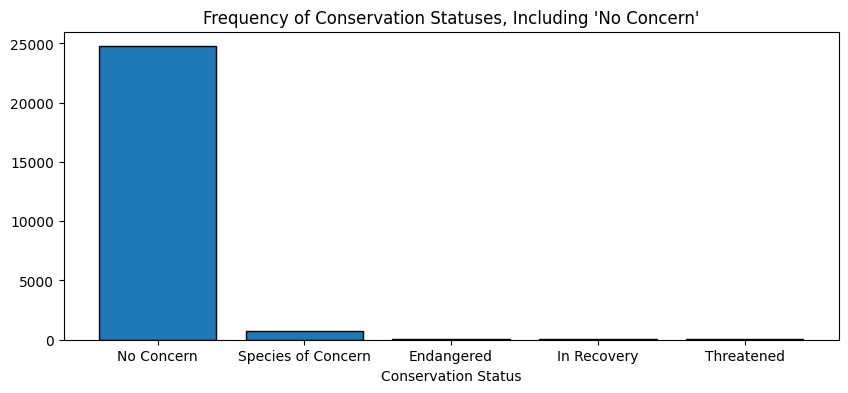

<Figure size 640x480 with 0 Axes>

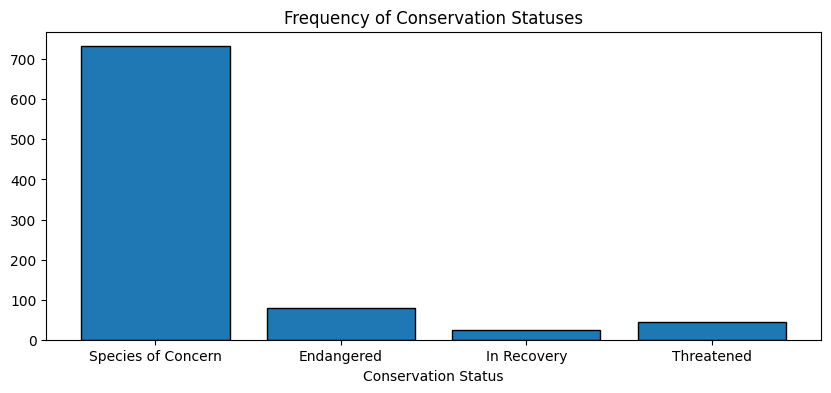

In [33]:
# Bar plot to visualize frequency of different conservation statuses

status = list(master['conservation_status'].unique())
frequency = []

for s in status:
    frequency.append(len(master[master['conservation_status'] == s]))
    
print(status)
print(frequency)

# Plot with 'No Concern'
plt.figure(figsize = (10, 4))
plt.bar(status, frequency, edgecolor = 'black')
plt.title('Frequency of Conservation Statuses, Including \'No Concern\'')
plt.xlabel('Conservation Status')
plt.show()

# Plot without 'No Concern'
plt.clf()
plt.figure(figsize = (10, 4))
plt.bar(status[1:], frequency[1:], edgecolor = 'black')
plt.title('Frequency of Conservation Statuses')
plt.xlabel('Conservation Status')
plt.show()

In [41]:
# Calculate total number of endangered species

no_concern = master['conservation_status'] != 'No Concern'
endangered = master[no_concern]

endangered_total = endangered['category'].value_counts().sum()

print('Total endangered species: ' + str(endangered_total))
print()
print(endangered['category'].value_counts())

Total endangered species: 880

Bird                 348
Mammal               232
Vascular Plant       184
Fish                  48
Amphibian             28
Reptile               20
Nonvascular Plant     20
Name: category, dtype: int64


In [42]:
# Calculate proportion of each species in total population

endangered_pop = []
population_prop = []

species_names = list(master['category'].unique())

for n in species_names:
    endangered_pop.append(len(endangered[endangered['category'] == n]))

for i in species_names:
    population_prop.append(len(endangered[endangered['category'] == i]) / endangered_total)

species_prop = list(zip(species_names, population_prop))

for p in species_prop:
    print('{animal}: {proportion}%'.format(animal = p[0], proportion = round(p[1], 2) * 100))

Mammal: 26.0%
Bird: 40.0%
Reptile: 2.0%
Amphibian: 3.0%
Fish: 5.0%
Vascular Plant: 21.0%
Nonvascular Plant: 2.0%


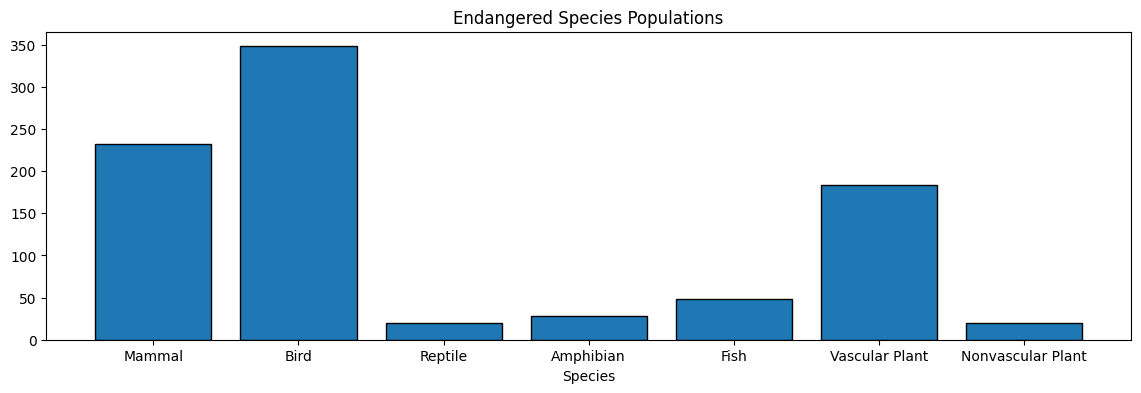

In [43]:
# Bar plot of endangered species populations

plt.figure(figsize = (14, 4))
plt.bar(species_names, endangered_pop, edgecolor = 'black')
plt.title('Endangered Species Populations')
plt.xlabel('Species')
plt.show()

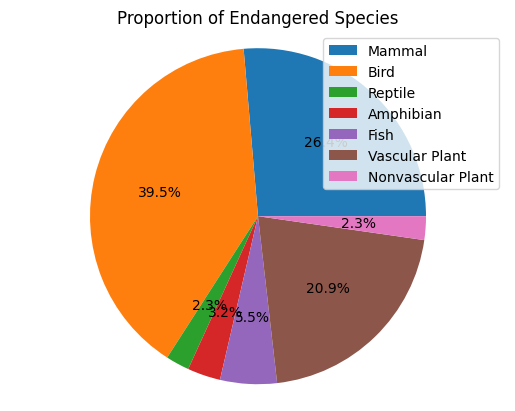

In [45]:
# Pie chart of endangered species proportions

plt.pie(population_prop, autopct='%0.1f%%')
plt.title('Proportion of Endangered Species')
plt.legend(species_names)
plt.axis('equal')
plt.show()

Ideally, this pie chart would only have five categories maximum. An 'Other' category would be helpful for categories less than 10%.

# National Parks Breakdown

In [79]:
# Separate national parks into separate dataframes

yosemite = master[master['park_name'] == 'Yosemite National Park']
smoky = master[master['park_name'] == 'Great Smoky Mountains National Park']
bryce = master[master['park_name'] == 'Bryce National Park']
yellowstone = master[master['park_name'] == 'Yellowstone National Park']

## Most Spotted Species

In [80]:
# Name most-spotted species in each national park, along with their observation counts

parks_lst = [yosemite, smoky, bryce, yellowstone]

for p in parks_lst:
    print(p.iloc[0, 4] + ':')
    spotted_freq = p.sort_values(by = 'observations', ascending = False)
    most_spotted = spotted_freq.iloc[0, 2]
    times_spotted = spotted_freq.iloc[0, -1]
    print(most_spotted + ': ' + str(times_spotted))
    print()

Yosemite National Park:
Shockley's Ivesia, Sky Mousetail: 223

Great Smoky Mountains National Park:
Spiny Sowthistle: 147

Bryce National Park:
Beaked Corn-Salad, Corn Salad: 176

Yellowstone National Park:
Deep-Root Clubmoss, Ground Cedar: 321

